<a href="https://colab.research.google.com/github/sushgho/Msc-Project/blob/master/Barclay%20Employee%20attrition%20Hr%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Employee Attrition using Machine learning and Python




#Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Store the data into the 'data' variable

In [38]:
data = pd.read_csv('HR Data.csv') 
data.head(10) #Print the first 10 rows

,EmployeeID,Age,Gender,MaritalStatus,Education_Level,EducationField,BusinessTravel,Department,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Role,Satisfaction,NumCompaniesWorked,OverTime,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager,Attrition
0,1,41,Female,Single,2,Social Sciences,rarely,Sales,1,5993,19479,1102,94,2,Sales Executive,4,8,Yes,8,6,4,0,5,Yes
1,2,49,Male,Married,1,Social Sciences,frequently,Research & Development,8,5130,24907,279,61,2,Research Scientist,2,1,No,10,10,7,1,7,No
2,4,37,Male,Single,2,Other,rarely,Research & Development,2,2090,2396,1373,92,1,Laboratory Technician,3,6,Yes,7,0,0,0,0,Yes
3,5,33,Female,Married,4,Social Sciences,frequently,Research & Development,3,2909,23159,1392,56,1,Research Scientist,3,1,Yes,8,8,7,3,0,No
4,7,27,Male,Married,1,Health Science,rarely,Research & Development,2,3468,16632,591,40,1,Laboratory Technician,2,9,No,6,2,2,2,2,No
5,8,32,Male,Single,2,Social Sciences,frequently,Research & Development,2,3068,11864,1005,79,1,Laboratory Technician,4,0,No,8,7,7,3,6,No
6,10,59,Female,Married,3,Health Science,rarely,Research & Development,3,2670,9964,1324,81,1,Laboratory Technician,1,4,Yes,12,1,0,0,0,No
7,11,30,Male,Divorced,1,Social Sciences,rarely,Research & Development,24,2693,13335,1358,67,1,Laboratory Technician,3,1,No,1,1,0,0,0,No
8,12,38,Male,Single,3,Social Sciences,frequently,Research & Development,23,9526,8787,216,44,3,Manufacturing Director,3,0,No,10,9,7,1,8,No
9,13,36,Male,Married,3,Health Science,rarely,Research & Development,27,5237,16577,1299,94,2,Healthcare Representative,3,6,No,17,7,7,7,7,No


#Get the number of rows and number of columns in the data

In [39]:
data.shape

(1470, 24)

#Get the column data types

In [40]:
data.dtypes

EmployeeID                  int64
Age                         int64
Gender                     object
MaritalStatus              object
Education_Level             int64
EducationField             object
BusinessTravel             object
Department                 object
Commute                     int64
MonthlyIncome               int64
MonthlyRate                 int64
DailyRate                   int64
HourlyRate                  int64
Grade                       int64
Role                       object
Satisfaction                int64
NumCompaniesWorked          int64
OverTime                   object
TotalExperienceYears        int64
YearsInCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithLineManager        int64
Attrition                  object
dtype: object

#Count the empty (NaN, NAN, na) values in each column

In [41]:
data.isna().sum()

EmployeeID                 0
Age                        0
Gender                     0
MaritalStatus              0
Education_Level            0
EducationField             0
BusinessTravel             0
Department                 0
Commute                    0
MonthlyIncome              0
MonthlyRate                0
DailyRate                  0
HourlyRate                 0
Grade                      0
Role                       0
Satisfaction               0
NumCompaniesWorked         0
OverTime                   0
TotalExperienceYears       0
YearsInCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithLineManager       0
Attrition                  0
dtype: int64

#Check for any null / missing values

In [42]:
data.isnull()#Another check for any null / missing values
data.isnull().values.any()

False

#View some basic statistical details like percentile, mean, standard deviation etc.

In [43]:
data.describe()

,EmployeeID,Age,Education_Level,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Satisfaction,NumCompaniesWorked,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,2.912925,9.192517,6502.931293,14313.103401,802.485714,65.891156,2.063946,2.728571,2.693197,11.279592,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,1.024165,8.106864,4707.956783,7117.786044,403.509100,20.329428,1.106940,1.102846,2.498009,7.780782,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,1.000000,1009.000000,2094.000000,102.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,2.000000,2911.000000,8047.000000,465.000000,48.000000,1.000000,2.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,3.000000,7.000000,4919.000000,14235.500000,802.000000,66.000000,2.000000,3.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,4.000000,14.000000,8379.000000,20461.500000,1157.000000,83.750000,3.000000,4.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,5.000000,29.000000,19999.000000,26999.000000,1499.000000,100.000000,5.000000,4.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000


#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)

In [44]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#Visualize the Attrition count 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


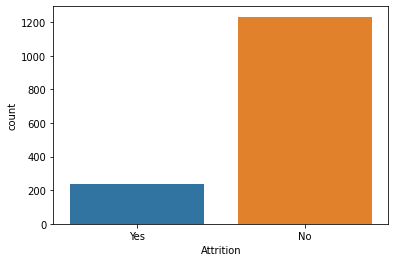

In [45]:
sns.countplot(data['Attrition'])

In [46]:
(1233-237)/1233

0.8077858880778589

#Show the number of employees that left and stayed by age

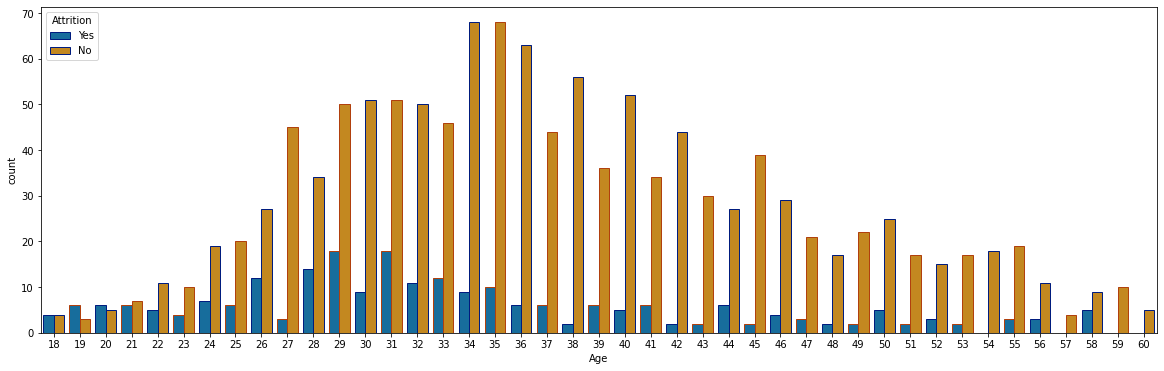

In [47]:
import matplotlib.pyplot as plt
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = data, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 2));

The age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.

In [48]:
data.groupby('Attrition').mean()

,EmployeeID,Age,Education_Level,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Satisfaction,NumCompaniesWorked,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager
Attrition,,,,,,,,,,,,,,,,
No,1027.656123,37.561233,2.927007,8.915653,6832.739659,14265.779400,812.504461,65.952149,2.145985,2.778589,2.645580,11.862936,7.369019,4.484185,2.234388,4.367397
Yes,1010.345992,33.607595,2.839662,10.632911,4787.092827,14559.308017,750.362869,65.573840,1.637131,2.468354,2.940928,8.244726,5.130802,2.902954,1.945148,2.852321


In [49]:
data.groupby('Department').mean()

,EmployeeID,Age,Education_Level,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Satisfaction,NumCompaniesWorked,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager
Department,,,,,,,,,,,,,,,,
Human Resources,1205.269841,37.809524,2.968254,8.698413,6654.507937,13492.984127,751.539683,64.301587,2.031746,2.603175,2.936508,11.555556,7.238095,3.539683,1.777778,3.666667
Research & Development,1006.503642,37.042664,2.899063,9.144641,6281.252862,14284.865765,806.851197,66.167534,1.977107,2.726327,2.733611,11.342352,6.864724,4.155047,2.137357,4.084287
Sales,1038.946188,36.542601,2.934978,9.365471,6959.172646,14489.793722,800.275785,65.520179,2.255605,2.751121,2.571749,11.105381,7.284753,4.486547,2.354260,4.271300


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


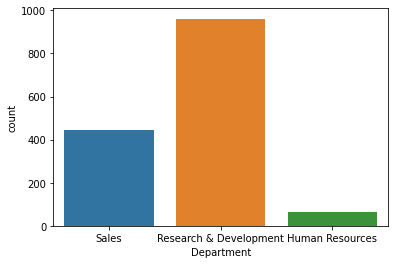

In [50]:
sns.countplot(data['Department'])

In [51]:
data.groupby('OverTime').mean()

,EmployeeID,Age,Education_Level,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Satisfaction,NumCompaniesWorked,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager
OverTime,,,,,,,,,,,,,,,,
No,1033.953510,36.762808,2.925996,9.062619,6484.926945,14217.302657,800.170778,65.990512,2.063567,2.711575,2.725806,11.217268,7.053131,4.296964,2.212524,4.216319
Yes,1001.838942,37.331731,2.879808,9.521635,6548.548077,14555.829327,808.350962,65.639423,2.064904,2.771635,2.610577,11.437500,6.894231,4.057692,2.125000,3.887019


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


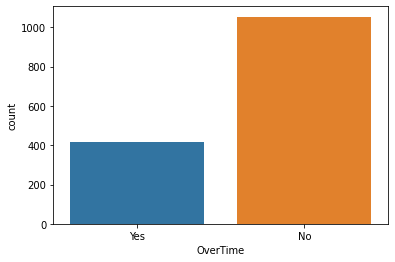

In [52]:
sns.countplot(data['OverTime'])

#Print all of the object data types and their unique values

In [53]:
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_________________________________________________________________
MaritalStatus : ['Single' 'Married' 'Divorced']
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
_________________________________________________________________
EducationField : ['Social Sciences' 'Other' 'Health Science' 'Business' 'Engineering'
 'Human Resources']
Social Sciences    606
Health Science     464
Business           159
Engineering        132
Other               82
Human Resources     27
Name: EducationField, dtype: int64
_________________________________________________________________
BusinessTravel : ['rarely' 'frequently' 'none']
rarely        1043
frequently     277
none           150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales    

#Get the correlation of the columns

In [54]:
data.corr()

,EmployeeID,Age,Education_Level,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Satisfaction,NumCompaniesWorked,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager
EmployeeID,1.000000,-0.010145,0.042070,0.032916,-0.014829,0.012648,-0.050990,0.035179,-0.018519,-0.046247,-0.001251,-0.014365,-0.011240,-0.008416,-0.009019,-0.009197
Age,-0.010145,1.000000,0.208034,-0.001686,0.497855,0.028051,0.010661,0.024287,0.509604,-0.004892,0.299635,0.680381,0.311309,0.212901,0.216513,0.202089
Education_Level,0.042070,0.208034,1.000000,0.021042,0.094961,-0.026084,-0.016806,0.016775,0.101589,-0.011296,0.126317,0.148280,0.069114,0.060236,0.054254,0.069065
Commute,0.032916,-0.001686,0.021042,1.000000,-0.017014,0.027473,-0.004985,0.031131,0.005303,-0.003669,-0.029251,0.004628,0.009508,0.018845,0.010029,0.014406
MonthlyIncome,-0.014829,0.497855,0.094961,-0.017014,1.000000,0.034814,0.007707,-0.015794,0.950300,-0.007157,0.149515,0.772893,0.514285,0.363818,0.344978,0.344079
MonthlyRate,0.012648,0.028051,-0.026084,0.027473,0.034814,1.000000,-0.032182,-0.015297,0.039563,0.000644,0.017521,0.026442,-0.023655,-0.012815,0.001567,-0.036746
DailyRate,-0.050990,0.010661,-0.016806,-0.004985,0.007707,-0.032182,1.000000,0.023381,0.002966,0.030571,0.038153,0.014515,-0.034055,0.009932,-0.033229,-0.026363
HourlyRate,0.035179,0.024287,0.016775,0.031131,-0.015794,-0.015297,0.023381,1.000000,-0.027853,-0.071335,0.022157,-0.002334,-0.019582,-0.024106,-0.026716,-0.020123
Grade,-0.018519,0.509604,0.101589,0.005303,0.950300,0.039563,0.002966,-0.027853,1.000000,-0.001944,0.142501,0.782208,0.534739,0.389447,0.353885,0.375281
Satisfaction,-0.046247,-0.004892,-0.011296,-0.003669,-0.007157,0.000644,0.030571,-0.071335,-0.001944,1.000000,-0.055699,-0.020185,-0.003803,-0.002305,-0.018214,-0.027656


#Visualize the correlation

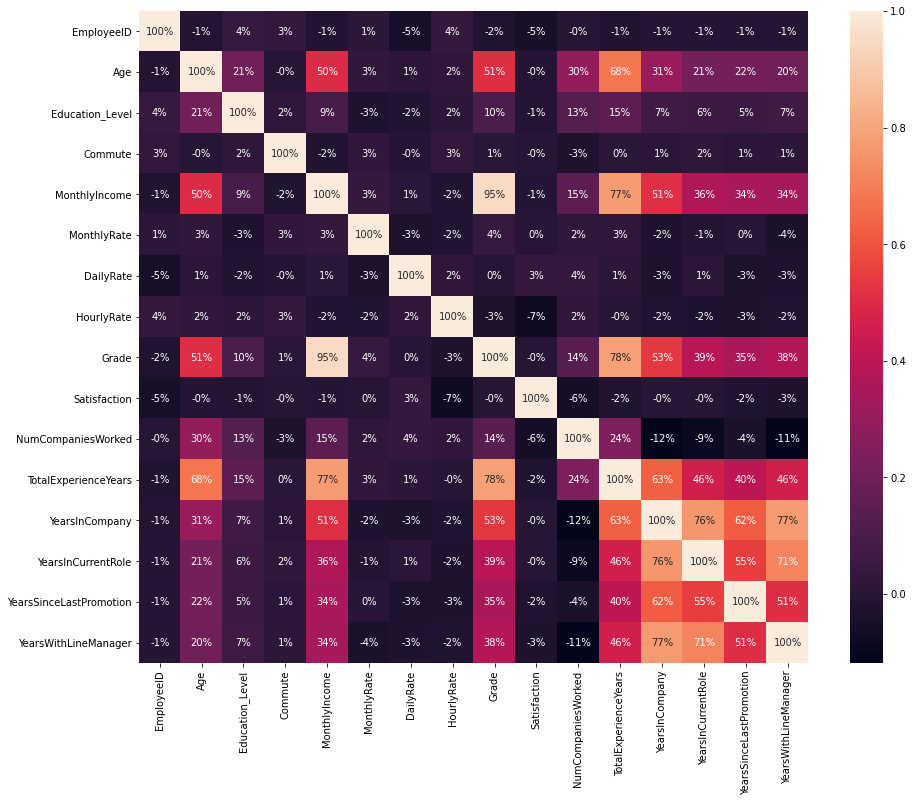

In [55]:
plt.figure(figsize=(15,12))  #15in by 15in
sns.heatmap(data.corr(), annot=True, fmt='.0%')

In [56]:
hr_data = data[['Attrition','Age' ,'BusinessTravel','Department',
                       'EducationField','Gender','Role',
                       'MaritalStatus','Commute',
                       'OverTime']].copy()
hr_data

,Attrition,Age,BusinessTravel,Department,EducationField,Gender,Role,MaritalStatus,Commute,OverTime
0,Yes,41,rarely,Sales,Social Sciences,Female,Sales Executive,Single,1,Yes
1,No,49,frequently,Research & Development,Social Sciences,Male,Research Scientist,Married,8,No
2,Yes,37,rarely,Research & Development,Other,Male,Laboratory Technician,Single,2,Yes
3,No,33,frequently,Research & Development,Social Sciences,Female,Research Scientist,Married,3,Yes
4,No,27,rarely,Research & Development,Health Science,Male,Laboratory Technician,Married,2,No
...,...,...,...,...,...,...,...,...,...,...
1465,No,36,frequently,Research & Development,Health Science,Male,Laboratory Technician,Married,23,No
1466,No,39,rarely,Research & Development,Health Science,Male,Healthcare Representative,Married,6,No
1467,No,27,rarely,Research & Development,Social Sciences,Male,Manufacturing Director,Married,4,Yes
1468,No,49,frequently,Sales,Health Science,Male,Sales Executive,Married,2,No


#Transform non-numeric columns into numerical columns

In [57]:
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
        if data[column].dtype == np.number:
            continue
        data[column] = LabelEncoder().fit_transform(data[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [58]:
data

,EmployeeID,Age,Gender,MaritalStatus,Education_Level,EducationField,BusinessTravel,Department,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Role,Satisfaction,NumCompaniesWorked,OverTime,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager,Attrition
0,0,23,0,2,1,5,2,2,0,809,999,624,64,1,7,3,8,1,8,6,4,0,5,1
1,1,31,1,1,0,5,0,1,7,682,1328,113,31,1,6,1,1,0,10,10,7,1,7,0
2,2,19,1,2,1,4,2,1,1,62,18,805,62,0,2,2,6,1,7,0,0,0,0,1
3,3,15,0,1,3,5,0,1,2,313,1228,820,26,0,6,2,1,1,8,8,7,3,0,0
4,4,9,1,1,0,2,2,1,1,399,846,312,10,0,2,1,9,0,6,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,18,1,1,1,2,0,1,22,210,599,494,11,1,2,3,4,0,17,5,2,0,3,0
1466,1466,21,1,1,0,2,2,1,5,1070,1123,327,12,2,0,0,4,0,9,7,7,1,7,0
1467,1467,9,1,1,2,5,2,1,3,821,175,39,57,1,4,1,1,1,6,6,2,0,3,0
1468,1468,31,1,1,2,2,0,2,1,730,641,579,33,1,7,1,2,0,17,9,6,0,8,0


#Create a new column at the end of the dataframe that contains the same value 

In [59]:
data['Age_Years'] = data['Age']
#Remove the first column called age 
data = data.drop('Age', axis = 1)
#Show the dataframe
data.head()

,EmployeeID,Gender,MaritalStatus,Education_Level,EducationField,BusinessTravel,Department,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Role,Satisfaction,NumCompaniesWorked,OverTime,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager,Attrition,Age_Years
0,0,0,2,1,5,2,2,0,809,999,624,64,1,7,3,8,1,8,6,4,0,5,1,23
1,1,1,1,0,5,0,1,7,682,1328,113,31,1,6,1,1,0,10,10,7,1,7,0,31
2,2,1,2,1,4,2,1,1,62,18,805,62,0,2,2,6,1,7,0,0,0,0,1,19
3,3,0,1,3,5,0,1,2,313,1228,820,26,0,6,2,1,1,8,8,7,3,0,0,15
4,4,1,1,0,2,2,1,1,399,846,312,10,0,2,1,9,0,6,2,2,2,2,0,9


#Create a new column at the end of the dataframe that contains the same value 

In [60]:
data['EmployeeID_Years'] = data['EmployeeID']
#Remove the first column called age 
data = data.drop('EmployeeID', axis = 1)
#Show the dataframe
data.head()

,Gender,MaritalStatus,Education_Level,EducationField,BusinessTravel,Department,Commute,MonthlyIncome,MonthlyRate,DailyRate,HourlyRate,Grade,Role,Satisfaction,NumCompaniesWorked,OverTime,TotalExperienceYears,YearsInCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithLineManager,Attrition,Age_Years,EmployeeID_Years
0,0,2,1,5,2,2,0,809,999,624,64,1,7,3,8,1,8,6,4,0,5,1,23,0
1,1,1,0,5,0,1,7,682,1328,113,31,1,6,1,1,0,10,10,7,1,7,0,31,1
2,1,2,1,4,2,1,1,62,18,805,62,0,2,2,6,1,7,0,0,0,0,1,19,2
3,0,1,3,5,0,1,2,313,1228,820,26,0,6,2,1,1,8,8,7,3,0,0,15,3
4,1,1,0,2,2,1,1,399,846,312,10,0,2,1,9,0,6,2,2,2,2,0,9,4


#Split the data into independent 'X' and dependent 'Y' variables

In [61]:
X = data.iloc[:, 1:data.shape[1]].values 
Y = data.iloc[:, 0].values 

# Split the dataset into 80% Training set and 20% Testing set


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

#Use Random Forest Classification algorithm

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#Get the accuracy on the training data

In [64]:
forest.score(X_train, Y_train)

0.9863945578231292

**The model is about 98% accurate on the training data**

In [65]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.45      0.38      0.42       125
           1       0.59      0.66      0.62       169

    accuracy                           0.54       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.53      0.54      0.53       294



In [66]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]
  
print(confusion_matrix)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[ 48  77]
 [ 58 111]]
Model Testing Accuracy = "0.5408163265306123!"



In [67]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


10-fold cross validation average accuracy: 0.569


In [68]:
#from sklearn.metrics import classification_report
#print(classification_report(Y_test, forest.predict(X_test)))

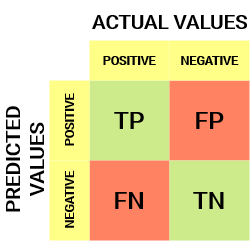

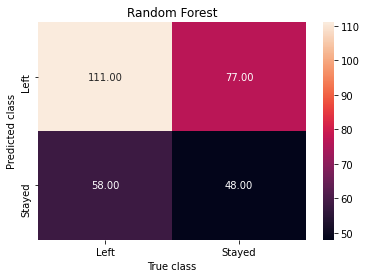

In [69]:
y_pred = forest.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, Y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('Predicted class')
plt.xlabel('True class')
plt.title('Random Forest')
plt.savefig('random_forest')

**The model correctly identified 54% of the employees that left the company.**


Finding the most Imported feature by ascending order

In [70]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':data.iloc[:,1:data.shape[1]].columns,'importance':np.round(forest.feature_importances_,4)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances

,importance
feature,
Attrition,0.0078
OverTime,0.0120
Department,0.0131
MaritalStatus,0.0167
BusinessTravel,0.0186
Grade,0.0201
YearsSinceLastPromotion,0.0285
EducationField,0.0296
Satisfaction,0.0297


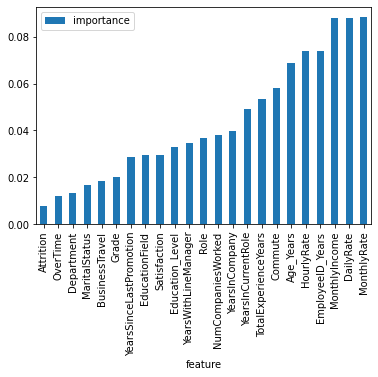

In [71]:
#Visualize the importance
importances.plot.bar()


**Monthly Rate appears to be the most important feature followed by the daily rate, and monthly income. Seeing this result makes me want to see if people with a higher income are less likely to leave than someone with a lower income.**